In [100]:
from IPython.display import Image

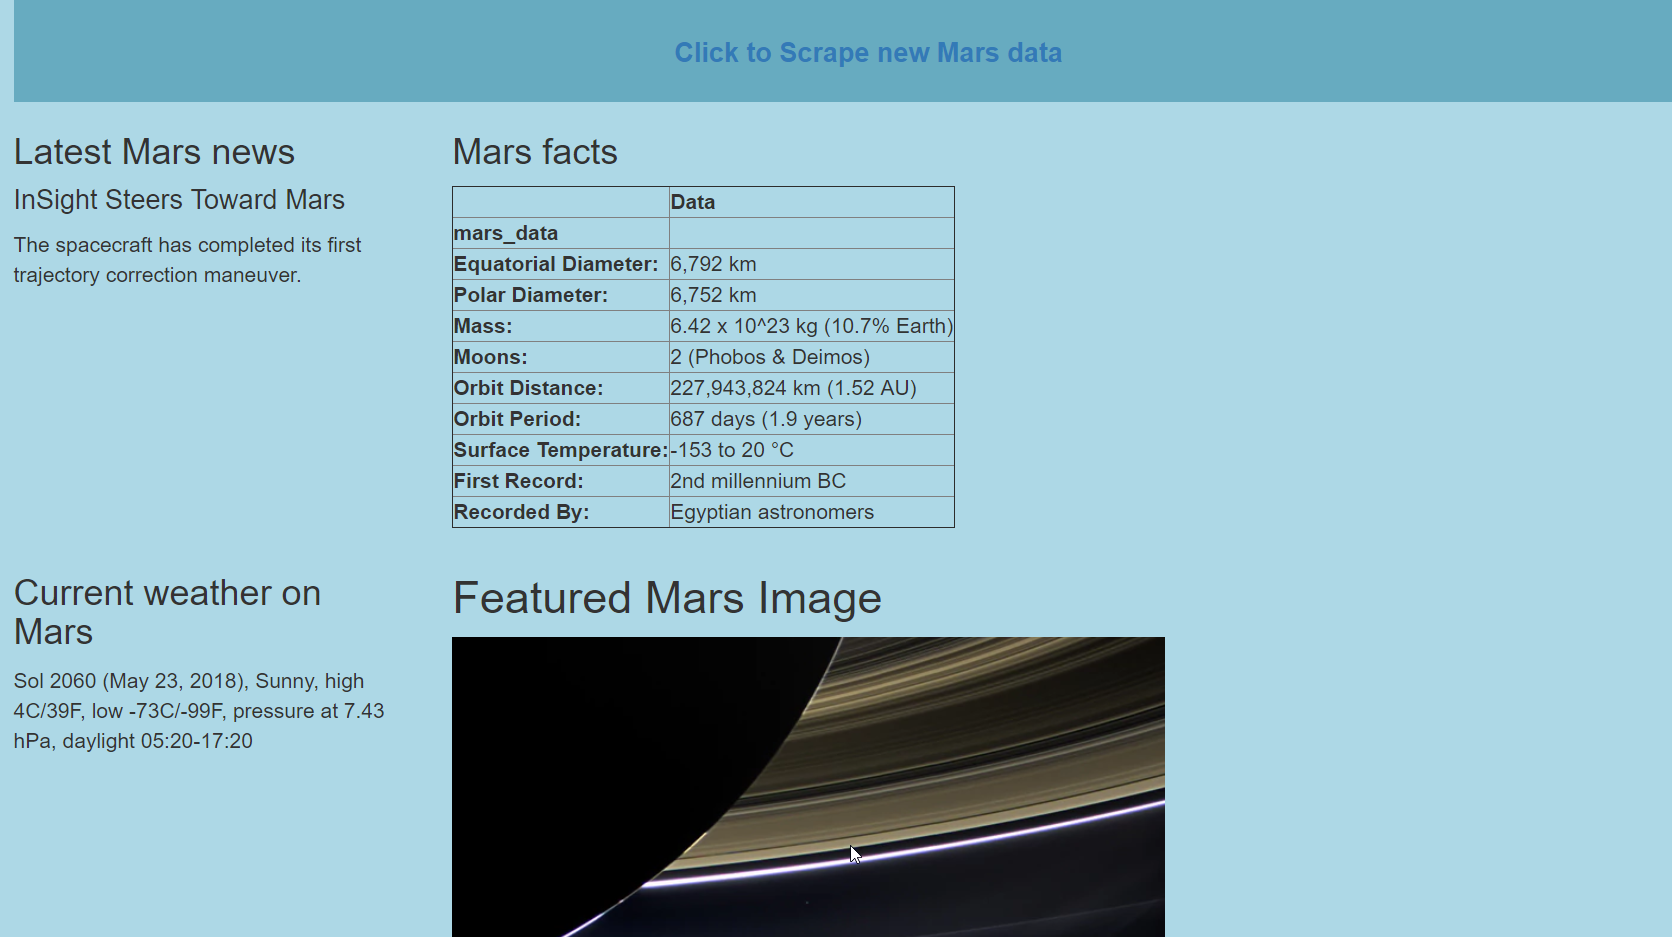

In [101]:
Image(filename='Mars_localhost5000page.png')

In [69]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import pymongo
from splinter import Browser
import requests
import time

from selenium import webdriver
import requests
import re


In [70]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)


In [71]:
marsurl = "https://mars.nasa.gov/news/"

browser.visit(marsurl)
time.sleep(1)


In [72]:
html = browser.html

soup = BeautifulSoup(html,'html.parser')

In [73]:
#print(soup.prettify())

In [74]:
# Get the first title by returning div element the class = content_title 

news_title = soup.find('div', class_='content_title').text

In [75]:
news_p = soup.find('div', class_="rollover_description_inner").text

In [76]:
print("-"*25)
print("The latest Mars news is:",news_title)
print("The summary of this latest news is:",news_p)

-------------------------
The latest Mars news is: InSight Steers Toward Mars
The summary of this latest news is: The spacecraft has completed its first trajectory correction maneuver.


In [77]:
#JPL Mars Space Images - Featured Image

jpl_url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(jpl_url)

In [78]:
# Scrape the browser into soup and use soup
# Save the image url 
html = browser.html
jplsoup = BeautifulSoup(html, 'html.parser')
image_url = jplsoup.find('a', {'id': 'full_image', 'data-fancybox-href': True}).get('data-fancybox-href')
image_url

'/spaceimages/images/mediumsize/PIA16763_ip.jpg'

In [79]:
# Get the url
jpl_logo_href = jplsoup.find_all('div', class_='jpl_logo')
print(jpl_logo_href)

[<div class="jpl_logo">
<a href="//www.jpl.nasa.gov/" id="jpl_logo" title="Jet Propulsion Laboratory">Jet Propulsion Laboratory</a>
</div>, <div class="jpl_logo">
<a class="" href="" id="jpl_logo" title="">Jet Propulsion Laboratory</a>
</div>]


In [80]:
# Create BeautifulSoup object; parse with 'html.parser'
html_page = browser.html
jplsoup = BeautifulSoup(html_page, "lxml")

In [81]:
# Get all the hrefs of the url
links = []
for link in jplsoup.find_all('a'):
    links.append(link.get('href'))
 

In [82]:

# Retrieve the href in the list 
jpl_link = links[1].strip('/')
print(jpl_link)

www.jpl.nasa.gov


In [83]:

featured_image_url = "https://"+jpl_link+image_url
print(featured_image_url)

https://www.jpl.nasa.gov/spaceimages/images/mediumsize/PIA16763_ip.jpg


In [84]:
#Mars Weather
twitter_url = "https://twitter.com/marswxreport?lang=en"
browser.visit(twitter_url)


In [85]:
html = browser.html
twittersoup = BeautifulSoup(html, 'html.parser')

In [86]:
weather = twittersoup.find('p', class_='TweetTextSize TweetTextSize--normal js-tweet-text tweet-text')
weather

<p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">Sol 2060 (May 23, 2018), Sunny, high 4C/39F, low -73C/-99F, pressure at 7.43 hPa, daylight 05:20-17:20</p>

In [87]:
mars_weather = weather.text.strip()
mars_weather

'Sol 2060 (May 23, 2018), Sunny, high 4C/39F, low -73C/-99F, pressure at 7.43 hPa, daylight 05:20-17:20'

In [88]:
#Mars Facts

marsfacts_url = "https://space-facts.com/mars/"
browser.visit(marsfacts_url)

In [89]:
html = browser.html
mars_facts = BeautifulSoup(html, 'html.parser')

In [90]:

# Convert to a pandas df
marsdf = pd.read_html(marsfacts_url)
marsfactsdf = pd.DataFrame(marsdf[0])

In [91]:
# Define the columns and set the index.  
marsfactsdf.columns = ['Characteristic','Data']
marsdf1 = marsfactsdf.set_index("Characteristic")
marsdf1

,Data
Characteristic,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.42 x 10^23 kg (10.7% Earth)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.52 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-153 to 20 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [92]:
# Convert the pd df to HTML table
marshtml_table = marsdf1.to_html(classes='marsdata')
mars_table = marshtml_table.replace('\n', ' ')
mars_table

'<table border="1" class="dataframe marsdata">   <thead>     <tr style="text-align: right;">       <th></th>       <th>Data</th>     </tr>     <tr>       <th>Characteristic</th>       <th></th>     </tr>   </thead>   <tbody>     <tr>       <th>Equatorial Diameter:</th>       <td>6,792 km</td>     </tr>     <tr>       <th>Polar Diameter:</th>       <td>6,752 km</td>     </tr>     <tr>       <th>Mass:</th>       <td>6.42 x 10^23 kg (10.7% Earth)</td>     </tr>     <tr>       <th>Moons:</th>       <td>2 (Phobos &amp; Deimos)</td>     </tr>     <tr>       <th>Orbit Distance:</th>       <td>227,943,824 km (1.52 AU)</td>     </tr>     <tr>       <th>Orbit Period:</th>       <td>687 days (1.9 years)</td>     </tr>     <tr>       <th>Surface Temperature:</th>       <td>-153 to 20 °C</td>     </tr>     <tr>       <th>First Record:</th>       <td>2nd millennium BC</td>     </tr>     <tr>       <th>Recorded By:</th>       <td>Egyptian astronomers</td>     </tr>   </tbody> </table>'

In [93]:
#Mars Hemisperes

marshemispheres_url = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(marshemispheres_url)



In [94]:
html = browser.html
mars_hemispheres = BeautifulSoup(html, 'html.parser')

In [ ]:
# Get the div element that holds the images. 
images = mars_hemispheres.find('div', class_='collapsible results')
print(images.prettify())

<div class="collapsible results">
 <div class="item">
  <a class="itemLink product-item" href="/search/map/Mars/Viking/cerberus_enhanced">
   <img alt="Cerberus Hemisphere Enhanced thumbnail" class="thumb" src="/cache/images/dfaf3849e74bf973b59eb50dab52b583_cerberus_enhanced.tif_thumb.png"/>
  </a>
  <div class="description">
   <a class="itemLink product-item" href="/search/map/Mars/Viking/cerberus_enhanced">
    <h3>
     Cerberus Hemisphere Enhanced
    </h3>
   </a>
   <span class="subtitle" style="float:left">
    image/tiff 21 MB
   </span>
   <span class="pubDate" style="float:right">
   </span>
   <br/>
   <p>
    Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. This mosaic is composed of 104 Viking Orbiter images acquired…
   </p>
  </div>
  <!-- end description -->
 </div>
 <div class="item">
  <a class="itemLink product-item" href="/search/map/Mars/Viking/schiaparelli_enhanced">
   <img 

In [98]:
hemispheres_image_urls = []

for i in range(len(images.find_all("div", class_="item"))):
    time.sleep(5)
    image = browser.find_by_tag('h3')
    image[i].click()
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find("h2", class_="title").text
    div = soup.find("div", class_="downloads")
    for li in div:
               link = div.find('a')
    url = link.attrs['href']
    hemispheres = {
            'title' : title,
            'img_url' : url
        }
    hemispheres_image_urls.append(hemispheres)
    browser.back()

In [99]:
hemispheres_image_urls

[{'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg',
  'title': 'Cerberus Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg',
  'title': 'Schiaparelli Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg',
  'title': 'Syrtis Major Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg',
  'title': 'Valles Marineris Hemisphere Enhanced'}]